# Seldon Labs 

In [1]:
import sys
sys.path.append('../')
import pygambit as gbt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## Experiment v1.0

In [2]:
def sample_from_distribution(mean, std_dev, num_samples=1):
    # Generate samples from a normal distribution
    samples = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
    return samples


In [3]:
def graph_distribution(mu, sigma): 
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.show()

Original mean: 10, Sample mean: 8.90
Original std: 2, Sample std: 0.00


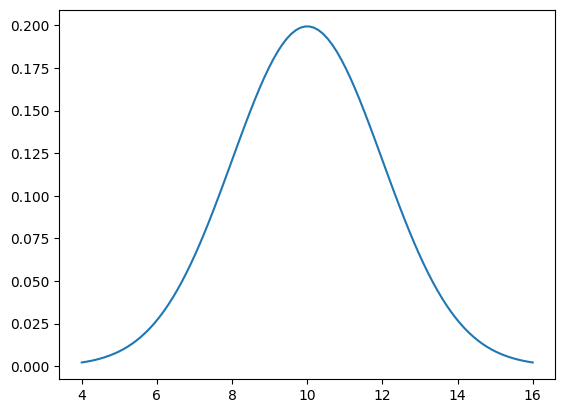

In [4]:
# Example usage
mean_value = 10
standard_deviation = 2
samples = sample_from_distribution(mean_value, standard_deviation)

# You can verify the parameters
print(f"Original mean: {mean_value}, Sample mean: {np.mean(samples):.2f}")
print(f"Original std: {standard_deviation}, Sample std: {np.std(samples):.2f}")
graph_distribution(mean_value, standard_deviation)

### Players

In [5]:
player_1 = 'China' 
player_2 = 'USA'

In [6]:
player1_data = {"ee": {"var1": {"mean":6,
                                "stdev":2
                               },
                       "var2": {"mean":6,
                                "stdev":2
                               },
                       "var3": {"mean":6,
                                "stdev":2
                               },
                       "var4": {"mean":6,
                                "stdev":2
                               },
                      },
                "ede": {"var1": {"mean":11,
                                "stdev":2
                               },
                       "var2": {"mean":11,
                                "stdev":2
                               },
                       "var3": {"mean":11,
                                "stdev":2
                               },
                        "var4": {"mean":11,
                                "stdev":2
                               },
                      },
                "dee": {"var1": {"mean":3,
                                "stdev":2
                               },
                       "var2": {"mean":3,
                                "stdev":2
                               },
                       "var3": {"mean":3,
                                "stdev":2
                               },
                        "var4": {"mean":3,
                                "stdev":2
                               },
                       },
                "dede": {"var1": {"mean":8,
                                "stdev":2
                               },
                       "var2": {"mean":8,
                                "stdev":2
                               },
                       "var3": {"mean":8,
                                "stdev":2
                               },
                         "var4": {"mean":8,
                                "stdev":2
                               },
                        }
               }

player2_data = {"ee": {"var1": {"mean":6,
                                "stdev":2
                               },
                       "var2": {"mean":6,
                                "stdev":2
                               },
                       "var3": {"mean":6,
                                "stdev":2
                               },
                       "var4": {"mean":6,
                                "stdev":2
                               },
                      },
                "ede": {"var1": {"mean":3,
                                "stdev":2
                               },
                       "var2": {"mean":3,
                                "stdev":2
                               },
                       "var3": {"mean":3,
                                "stdev":2
                               },
                        "var4": {"mean":3,
                                "stdev":2
                               },
                      },
                "dee": {"var1": {"mean":11,
                                "stdev":2
                               },
                       "var2": {"mean":11,
                                "stdev":2
                               },
                       "var3": {"mean":11,
                                "stdev":2
                               },
                        "var4": {"mean":11,
                                "stdev":2
                               },
                       },
                "dede": {"var1": {"mean":8,
                                "stdev":2
                               },
                       "var2": {"mean":8,
                                "stdev":2
                               },
                       "var3": {"mean":8,
                                "stdev":2
                               },
                         "var4": {"mean":8,
                                "stdev":2
                               },
                        }
               }

### Monte-Carlo Simulation

In [7]:
class Player(): 
    def __init__(self, data, player_name):
        self.data = data 
        self.name = player_name

    def calculate_payoff(self, scenario, payoff_func):
        var1 = float(sample_from_distribution(self.data[scenario]['var1']['mean'], self.data[scenario]['var1']['stdev'], num_samples=1)[0])
        var2 = float(sample_from_distribution(self.data[scenario]['var2']['mean'], self.data[scenario]['var2']['stdev'], num_samples=1)[0])
        var3 = float(sample_from_distribution(self.data[scenario]['var3']['mean'], self.data[scenario]['var3']['stdev'], num_samples=1)[0])
        var4 = float(sample_from_distribution(self.data[scenario]['var4']['mean'], self.data[scenario]['var4']['stdev'], num_samples=1)[0])
        variables_used = {'var1': var1, "var2": var2, "var3": var3, "var4": var4}
        return variables_used, payoff_func(var1, var2, var3, var4)
        

In [8]:
def payoffs_formula(var1, var2, var3, var4): 
    return var1+var2+var3+var4

In [9]:
def record_samples(scenario,samples_dictionary, record_dictionary): 
    for key in samples_dictionary: 
        record_dictionary[scenario][key].append(samples_dictionary[key])
    return

In [10]:
def record_results(df_dict, player1_samples, player2_samples, player1_payoffs, player2_payoffs, results, player_1, player_2): 
    # Record variables
    for scenario in player1_samples:
        for variable in player1_samples[scenario]: 
            df_dict[f'{player1.name}_{scenario}_{variable}'] = player1_samples[scenario][variable]

    for scenario in player2_samples:
        for variable in player2_samples[scenario]: 
            df_dict[f'{player2.name}_{scenario}_{variable}'] = player2_samples[scenario][variable]

    # record payoffs and outcomes
    for scenario in player1_payoffs:
        df_dict[f'{player1.name}_{scenario}_payoffs'] = player1_payoffs[scenario]
        
    for scenario in player2_payoffs:
        df_dict[f'{player2.name}_{scenario}_payoffs'] = player2_payoffs[scenario]

    # record ouctomes 
    df_dict[f'{player1.name}_expand_probability'] = player1_payoffs['expand']
    df_dict[f'{player1.name}_dont_expand_probability'] = player1_payoffs["don't expand"]
    df_dict[f'{player2.name}_expand_probability'] = player2_payoffs['expand']
    df_dict[f'{player2.name}_dont_expand_probability'] = player2_payoffs["don't expand"]

In [11]:
def create_two_player_game(player1, player2, payoff1, payoff2):
    """
    Create a Prisoner's Dilemma game using Pygambit.
    
    Parameters:
    - cooperate_reward: Payoff when both players cooperate (default: -1)
    - defect_reward: Payoff when both players defect (default: 0)
    - temptation: Payoff for defecting while other cooperates (default: 1)
    - sucker: Payoff for cooperating while other defects (default: -2)
    
    Returns:
    - game: Pygambit strategic game object
    """
    # Create a new strategic game with 2 players, 2 strategies each
    game = gbt.Game.from_arrays(payoff1, payoff2)
    
    # Set the game title
    game.title = "Prisoner's Dilemma"
    
    # Set player names
    game.players[0].label = player1
    game.players[1].label = player2
    
    # Set strategy labels for both players
    game.players[0].strategies[0].label = "Expand"
    game.players[0].strategies[1].label = "Don't Expand"
    game.players[1].strategies[0].label = "Expand"
    game.players[1].strategies[1].label = "Don't Expand"
    
    return game

In [12]:
player1_samples = {"ee": {"var1": [],
                          "var2": [],
                          "var3": [],
                          "var4": [],
                         },
                   "ede": {"var1": [],
                           "var2": [],
                           "var3": [],
                           "var4": [],
                          },
                   "dee": {"var1": [],
                           "var2": [],
                           "var3": [],
                           "var4": [],
                          },
                   "dede": {"var1": [],
                            "var2": [],
                            "var3": [],
                            "var4": [],
                           }
                  }

player2_samples = {"ee": {"var1": [],
                          "var2": [],
                          "var3": [],
                          "var4": [],
                         },
                   "ede": {"var1": [],
                           "var2": [],
                           "var3": [],
                           "var4": [],
                          },
                   "dee": {"var1": [],
                           "var2": [],
                           "var3": [],
                           "var4": [],
                          },
                   "dede": {"var1": [],
                            "var2": [],
                            "var3": [],
                            "var4": [],
                           }
                  }

In [13]:
# Number of simulations
num_sims = 500
    
# Create players
player1 = Player(player1_data, "China")
player2 = Player(player2_data, "USA")

df_dict = {} 

player1_payoffs = {'ee': [],
                   'ede': [],
                   'dee': [],
                   'dede': [],
                   'expand': [],
                   "don't expand":[]
                  } 

player2_payoffs = {'ee': [],
                   'ede': [],
                   'dee': [],
                   'dede': [],
                   'expand': [],
                   "don't expand": []
                  } 


for i in range(num_sims): 
    # Sample Player 1 Payoffs 
    p1_ee_variables, p1_ee = player1.calculate_payoff('ee', payoffs_formula)
    p1_ede_variables, p1_ede = player1.calculate_payoff('ede', payoffs_formula)
    p1_dee_variables, p1_dee = player1.calculate_payoff('dee', payoffs_formula)
    p1_dede_variables, p1_dede = player1.calculate_payoff('dede', payoffs_formula)
    
    # Sample Player 2 payoffs
    p2_ee_variables, p2_ee = player2.calculate_payoff('ee', payoffs_formula)
    p2_ede_variables, p2_ede = player2.calculate_payoff('ede', payoffs_formula)
    p2_dee_variables, p2_dee = player2.calculate_payoff('dee', payoffs_formula)
    p2_dede_variables, p2_dede = player2.calculate_payoff('dede', payoffs_formula)

    payoff_player1 = [[p1_ee, p1_ede], [p1_dee, p1_dede]]
    payoff_player2 = [[p2_ee, p2_ede], [p2_dee, p2_dede]]

    g = create_two_player_game(player_1, player_2, payoff_player1, payoff_player2)
    results = gbt.nash.enumpure_solve(g, use_strategic=False)
    if len(results.equilibria) == 0: 
        print('no strategy found')
        continue
        
    # Record Samples
    player1_payoffs['ee'].append(p1_ee) 
    player1_payoffs['ede'].append(p1_ede) 
    player1_payoffs['dee'].append(p1_dee) 
    player1_payoffs['dede'].append(p1_dede) 

    player2_payoffs['ee'].append(p2_ee) 
    player2_payoffs['ede'].append(p2_ede) 
    player2_payoffs['dee'].append(p2_dee) 
    player2_payoffs['dede'].append(p2_dede) 
    
    ## Record Results
    record_samples('ee', p1_ee_variables, player1_samples)
    record_samples('ede', p1_ede_variables, player1_samples)
    record_samples('dee', p1_dee_variables, player1_samples)
    record_samples('dede', p1_dede_variables, player1_samples)

    record_samples('ee', p2_ee_variables, player2_samples)
    record_samples('ede', p2_ede_variables, player2_samples)
    record_samples('dee', p2_dee_variables, player2_samples)
    record_samples('dede', p2_dede_variables, player2_samples)

    p1_de = float(results.equilibria[0][player_1]["Don't Expand"]*100)
    p1_e = float(results.equilibria[0][player_1]['Expand']*100)
    p2_de = float(results.equilibria[0][player_2]["Don't Expand"]*100)
    p2_e = float(results.equilibria[0][player_2]['Expand']*100)

    player1_payoffs['expand'].append(p1_e) 
    player1_payoffs["don't expand"].append(p1_de) 

    player2_payoffs['expand'].append(p2_e) 
    player2_payoffs["don't expand"].append(p2_de) 

no strategy found


In [14]:
record_results(df_dict, player1_samples, player2_samples, player1_payoffs, player2_payoffs, results, player_1, player_2)

In [15]:
columns = ['China_ee_var1', 'China_ee_var2','China_ee_var3','China_ee_var4',
           'China_ede_var1', 'China_ede_var2','China_ede_var3','China_ede_var4',
           'China_dee_var1', 'China_dee_var2', 'China_dee_var3','China_dee_var4',
           'China_dede_var1', 'China_dede_var2','China_dede_var3','China_dede_var4',
           'USA_ee_var1', 'USA_ee_var2','USA_ee_var3', 'USA_ee_var4',
           'USA_ede_var1','USA_ede_var2','USA_ede_var3', 'USA_ede_var4',
           'USA_dee_var1','USA_dee_var2','USA_dee_var3','USA_dee_var4',
           'USA_dede_var1', 'USA_dede_var2','USA_dede_var3', 'USA_dede_var4', 
           'China_ee_payoffs','USA_ee_payoffs',
           'China_ede_payoffs','USA_ede_payoffs',
           'China_dee_payoffs','USA_dee_payoffs',
           'China_dede_payoffs','USA_dede_payoffs',
           'China_expand_probability',
           'China_dont_expand_probability',	
           'USA_expand_probability', 
           'USA_dont_expand_probability']

In [16]:
df = pd.DataFrame.from_dict(df_dict)[columns]
df.to_excel('results_500sim.xlsx')

In [ ]:
# Plot distributions

In [ ]:
for scenario in player1_data:
    for variable in player1_data[scenario]: 
        mu = player1_data[scenario][variable]['mean']
        sigma = player1_data[scenario][variable]['stdev']
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label = variable)
    plt.title(f'{scenario} variable distributions')
    plt.legend()
    plt.show()

In [ ]:
for scenario in player2_data:
    for variable in player2_data[scenario]: 
        mu = player2_data[scenario][variable]['mean']
        sigma = player2_data[scenario][variable]['stdev']
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label = variable)
    plt.title(f'{scenario} variable distributions')
    plt.legend()
    plt.show()

In [ ]:
# TO DO: 
# Should record what values create no strategy
# Create tree form of games 
# Create heuristic for statistic tool 